### Import basic modules

In [43]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

### Import dataset

In [44]:
df = pd.read_csv('data/Dataset.csv')

/tmp/ipykernel_857262/84244152.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/Dataset.csv')


### I/ Data cleansing (and export)
 
Using our speculations, deductions and conclusions in documentation/cleansing.md report, we would like to introduce some cleansing methods for this datasets as shown below. 

In [45]:
import modules.cleansing as cl

df = cl.remove_columns(df, ['PATIENT_TYPE'])
df = cl.remove_invalid_values(df)
df = cl.mapping_bool_values(df=df, excluded_columns=['index', 'USMER', 'MEDICAL_UNIT', 'DATE_DIED', 'AGE', 'CLASIFFICATION_FINAL'])
df_original = df.copy()
# df = cl.remove_outliers(df, 'AGE')
df = cl.impute_missing_values(df=df, excluded_columns=['index', 'USMER', 'MEDICAL_UNIT', 'DATE_DIED', 'AGE'])

In [46]:
df.to_csv('data/Dataset_revised_new.csv', index=False)
df_original.to_csv('data/Dataset_revised_org.csv', index=False)
df.describe()

,index,USMER,MEDICAL_UNIT,SEX,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,2.000310e+05,200031.000000,200031.000000,200031.000000,200031.000000,200031.000000,200031.000000,200031.000000,200031.000000,200031.000000,200031.000000,200031.000000,200031.000000,200031.000000,200031.000000,200031.000000,200031.000000,200031.000000,200031.000000,200031.000000
mean,3.414971e+05,1.442926,7.405347,1.591433,0.188206,0.608961,52.770031,0.009863,0.293734,0.044193,0.027206,0.037299,0.332378,0.060236,0.050872,0.203338,0.059916,0.085657,4.595188,0.097530
std,2.575374e+05,0.496733,3.693446,0.491570,0.390877,0.487984,19.829846,0.098824,0.455473,0.205525,0.162683,0.189495,0.471067,0.237924,0.219737,0.402483,0.237331,0.279857,1.906715,0.296679
min,2.000000e+00,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,9.200550e+04,1.000000,4.000000,1.000000,0.000000,0.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,3.446180e+05,1.000000,6.000000,2.000000,0.000000,1.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
75%,4.666905e+05,2.000000,12.000000,2.000000,0.000000,1.000000,67.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000
max,1.048571e+06,2.000000,13.000000,2.000000,1.000000,1.000000,118.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000


### II/ Descriptive Statistics and Data Visualisation: 
 


In [47]:
df_original = pd.read_csv('data/Dataset_revised_org.csv')
df = pd.read_csv('data/Dataset_revised_new.csv')

/tmp/ipykernel_857262/2795104614.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv('data/Dataset_revised_org.csv')
/tmp/ipykernel_857262/2795104614.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/Dataset_revised_new.csv')


In [48]:
new_column_list = []
for column in df.columns:
    if column not in ['index', 'USMER', 'MEDICAL_UNIT', 'DATE_DIED']:
        new_column_list.append(column)

analytics_df_main = df[new_column_list].copy()
analytics_df_main

,SEX,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2.0,1.0,0.0,55,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
1,1.0,0.0,1.0,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
2,1.0,0.0,0.0,37,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0
3,1.0,0.0,0.0,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
4,2.0,0.0,0.0,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200026,1.0,0.0,1.0,61,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0
200027,1.0,0.0,1.0,63,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0,0.0
200028,1.0,0.0,0.0,23,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0,0.0
200029,1.0,0.0,0.0,56,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0


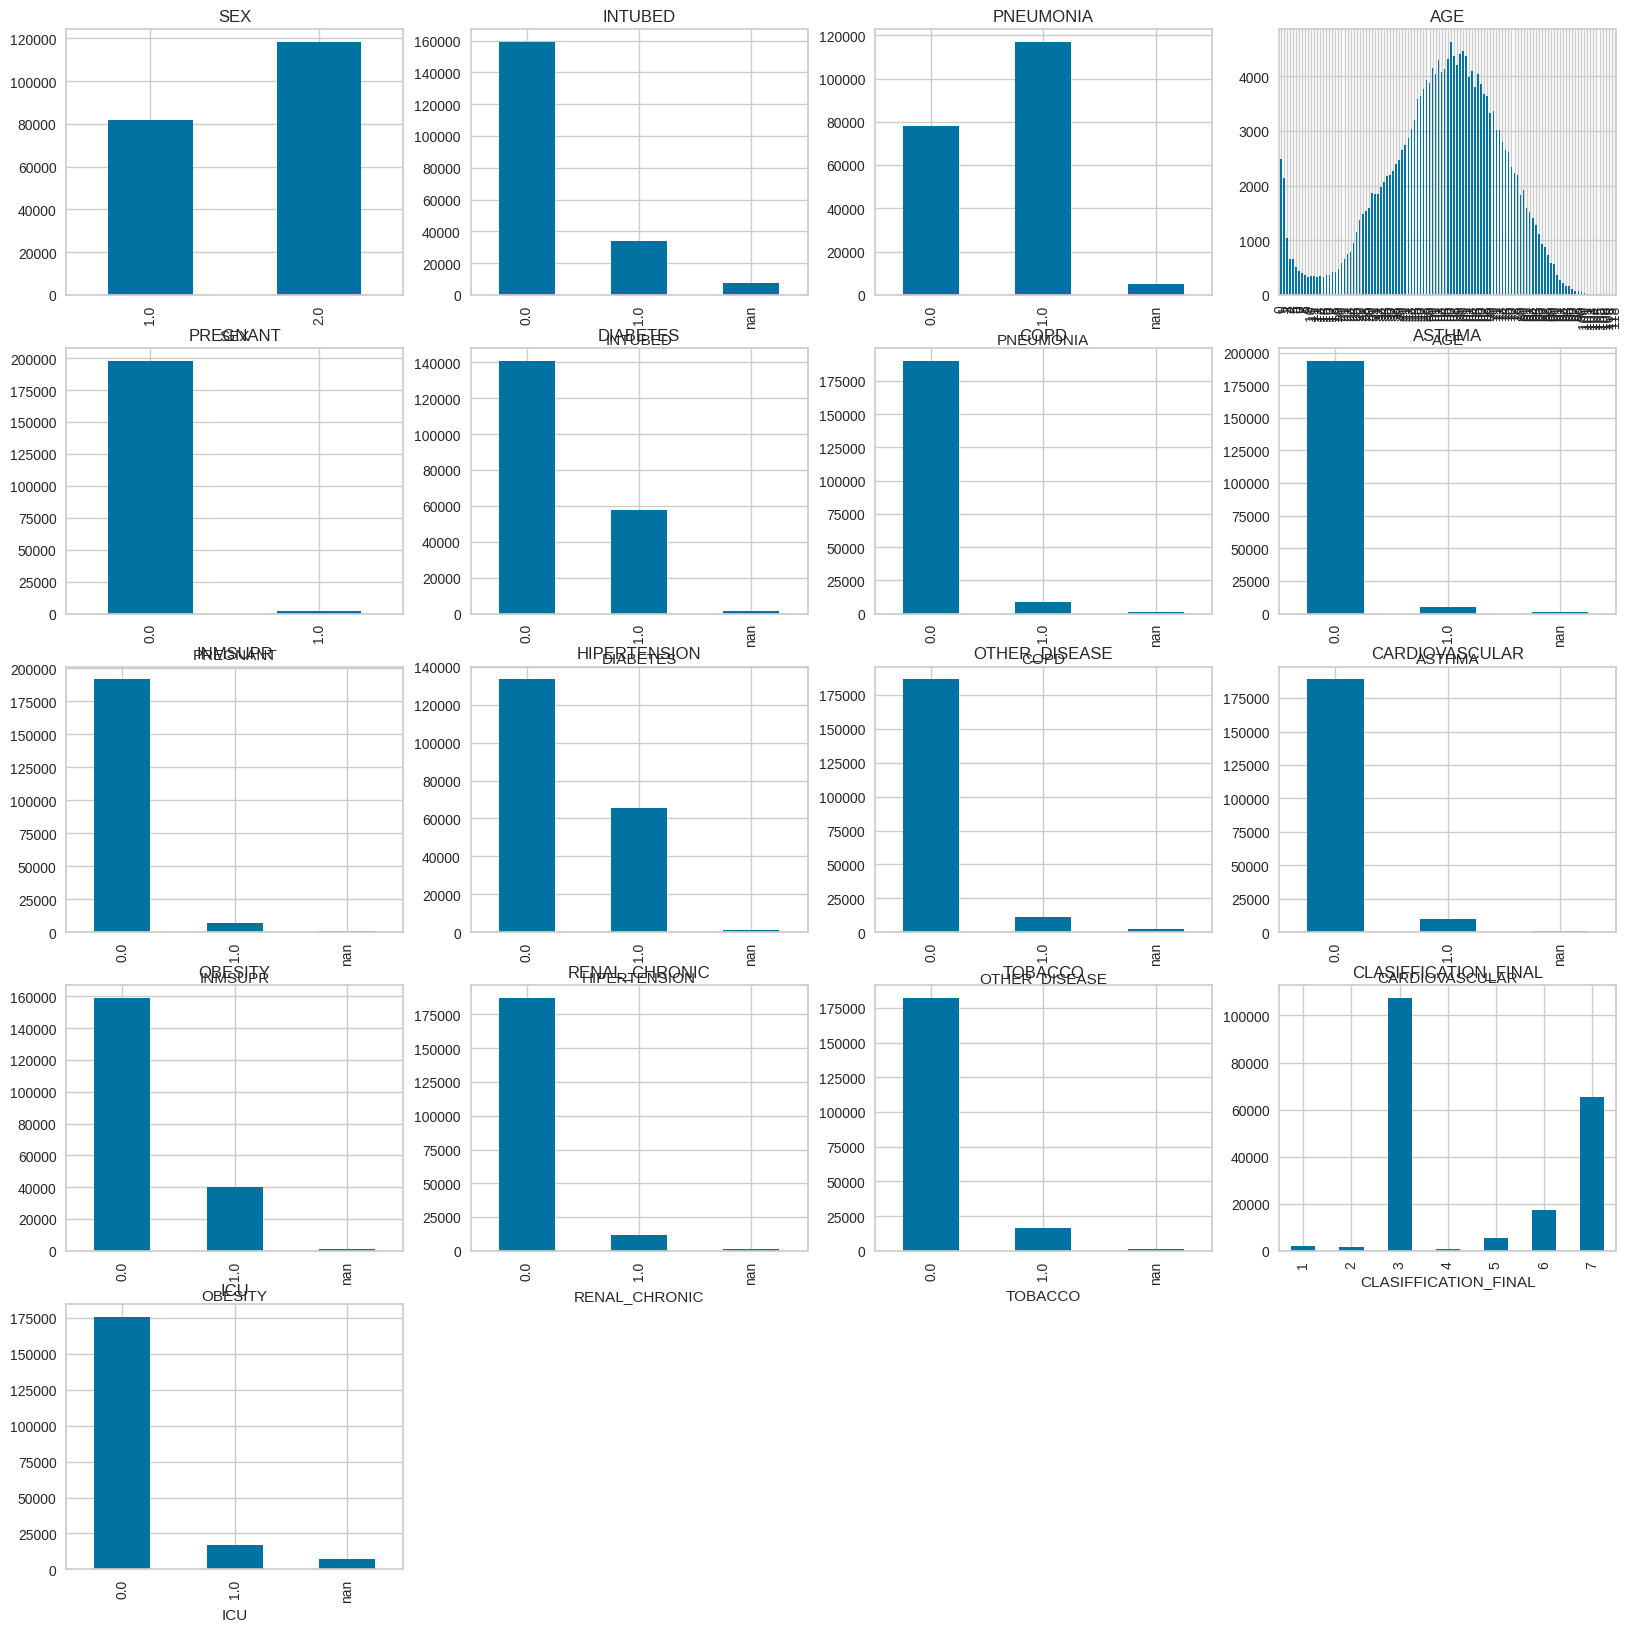

In [49]:
import modules.analytics_helper as ah

org_analytics_df = df_original[new_column_list].copy()
# analytics_df
# print(org_analytics_df['PNEUMONIA'])

ah.plot_multiple_metrics(df=org_analytics_df, columns=new_column_list, figsize=(20, 20))

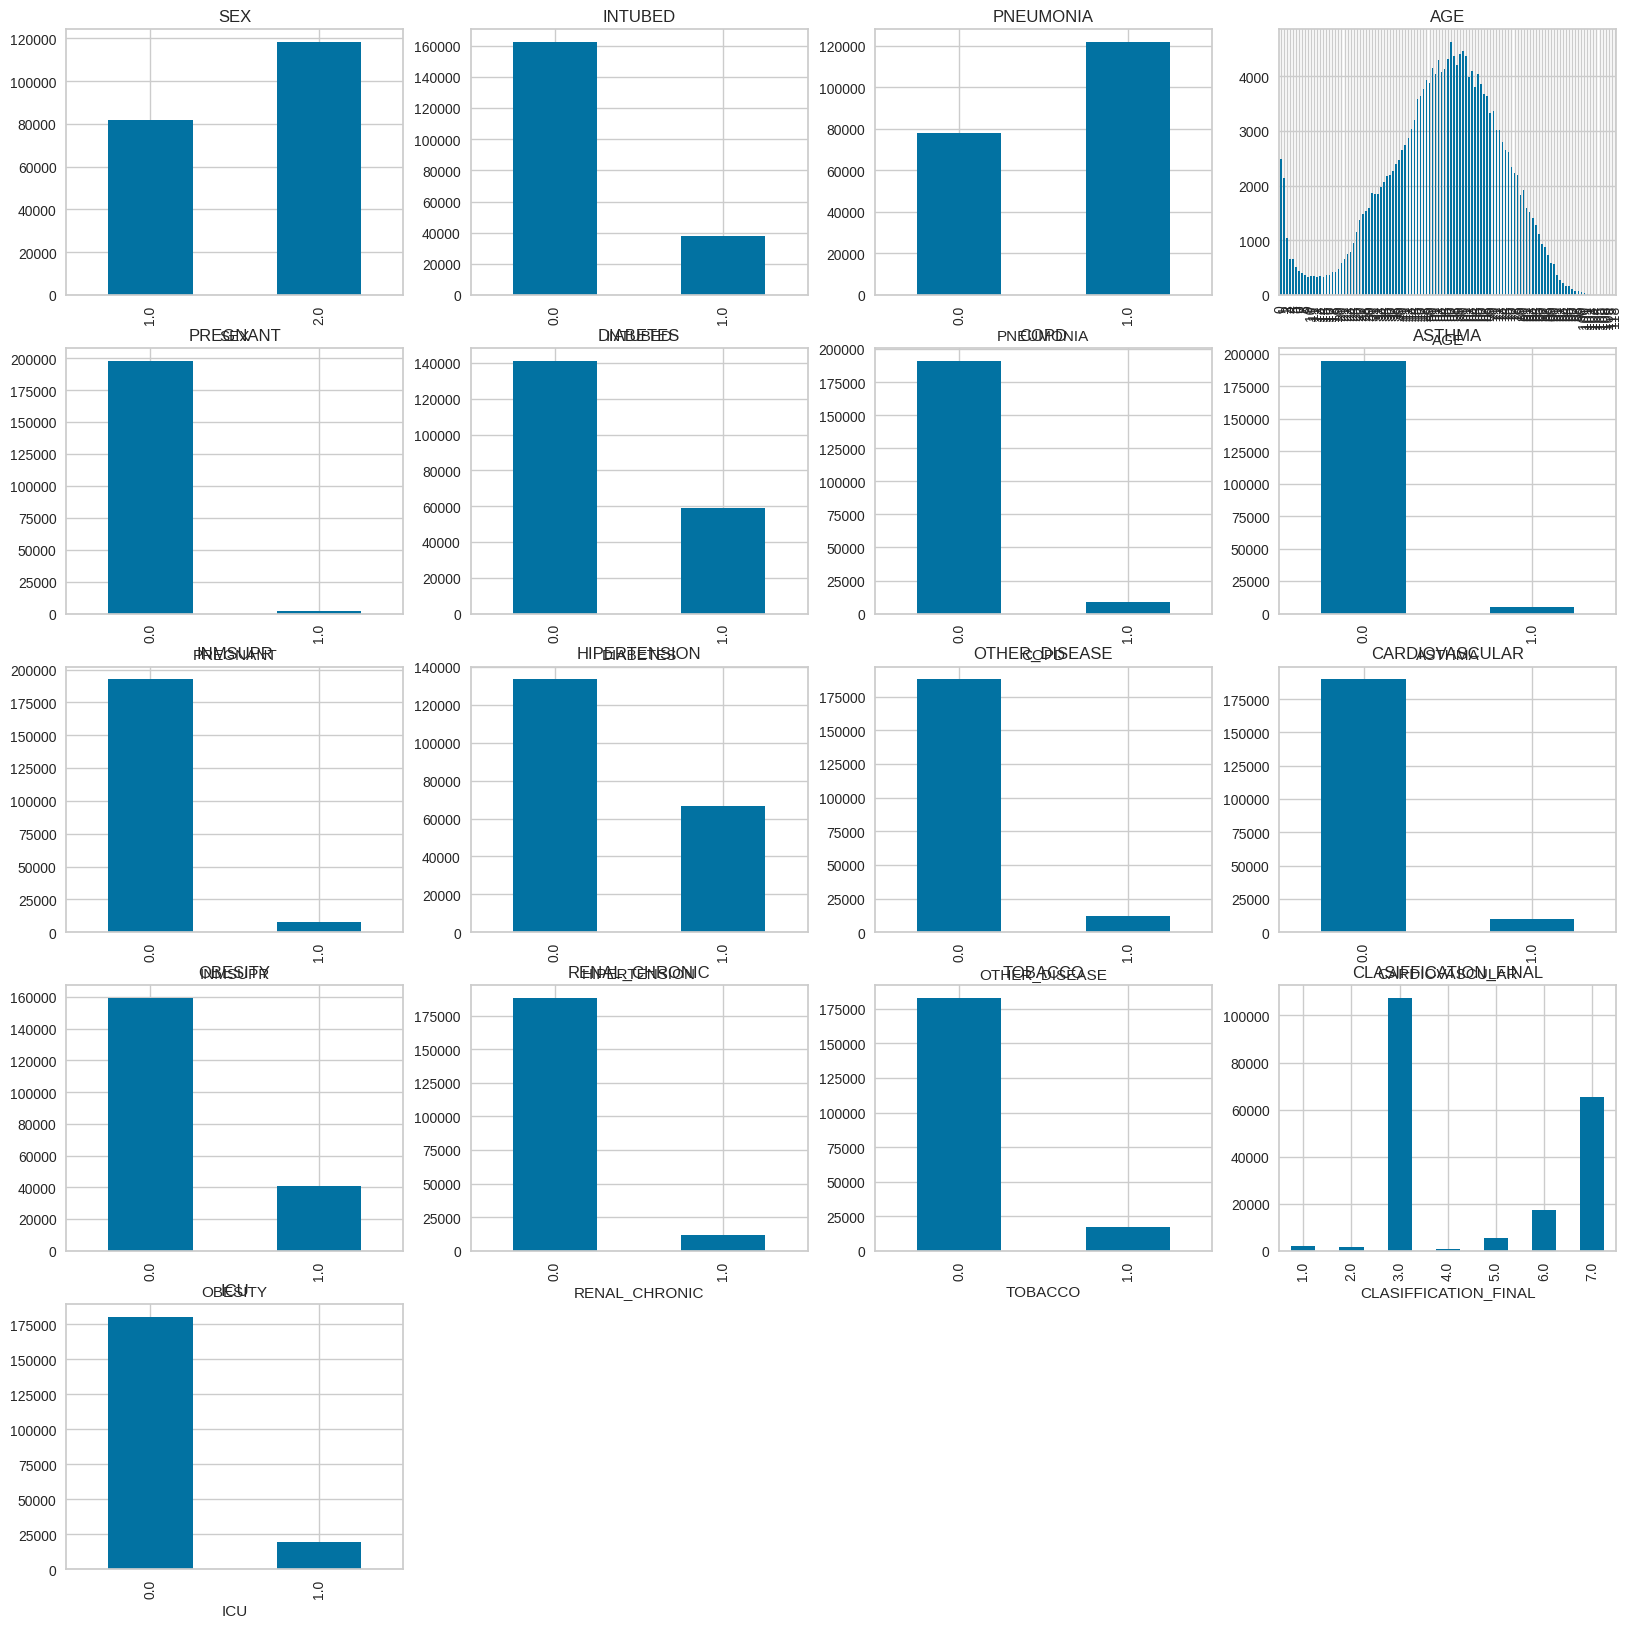

In [50]:
import modules.analytics_helper as ah

ah.plot_multiple_metrics(df=analytics_df_main, columns=new_column_list, figsize=(20, 20))

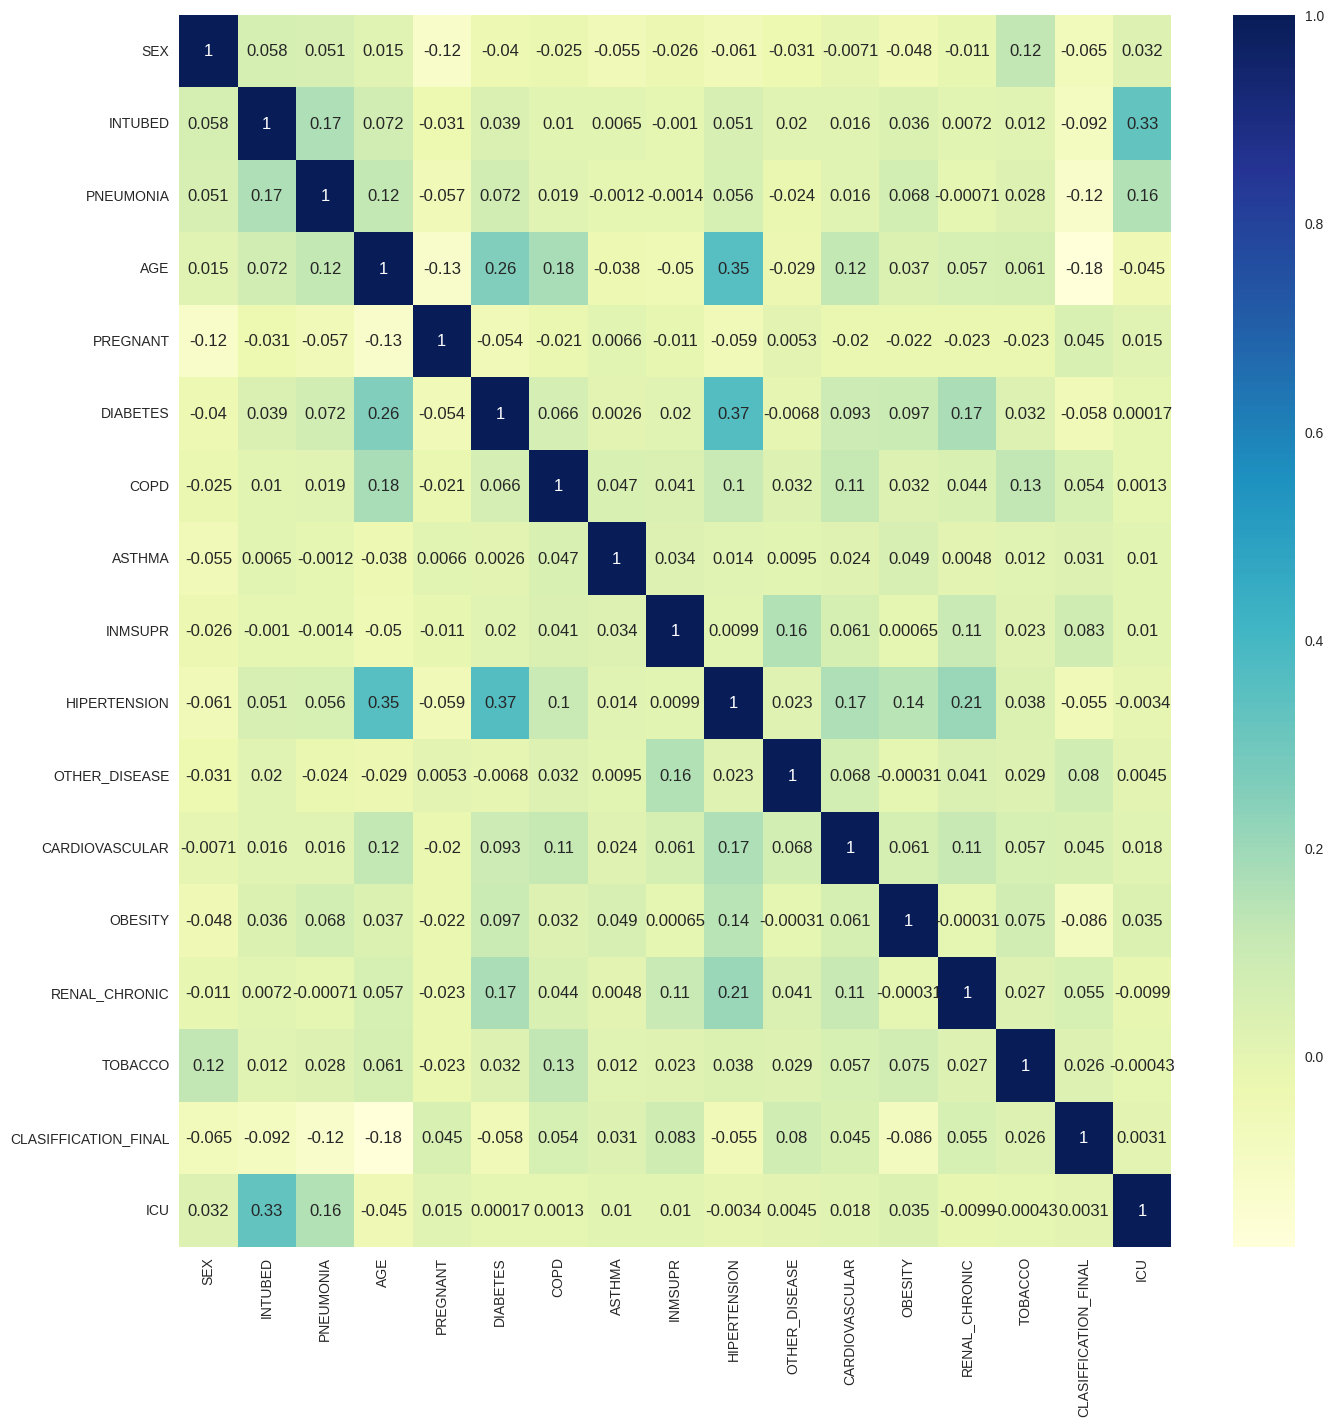

In [51]:
plt.figure(figsize=(16, 16))
co_mtx = analytics_df_main.corr(method ='pearson')

# Plot correlation heatmap
sns.heatmap(co_mtx, cmap="YlGnBu", annot=True)

# Display heatmap
plt.show()

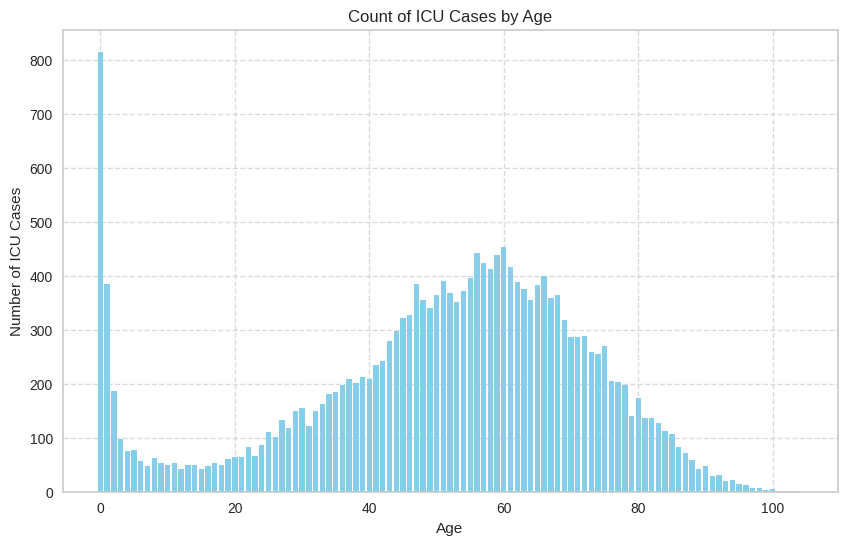

In [52]:
icu_by_age = analytics_df_main[analytics_df_main['ICU'] == 1.0].groupby('AGE').size().reset_index(name='ICU_Count')

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(icu_by_age['AGE'], icu_by_age['ICU_Count'], color='skyblue')
plt.xlabel('Age')
plt.ylabel('Number of ICU Cases')
plt.title('Count of ICU Cases by Age')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### III/ Model

In [53]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif, VarianceThreshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
import modules.modeling as md
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score
import modules.modeling_pyspark as mdp

# Discretize features into bins (e.g., 5 bins)
y = analytics_df_main['ICU']
X = analytics_df_main.drop(['ICU', 'CLASIFFICATION_FINAL'], axis=1)

analytics_df = analytics_df_main.drop(['CLASIFFICATION_FINAL'], axis=1)
# analytics_df['AGE'] = pd.cut(analytics_df['AGE'], bins=10, labels=False)


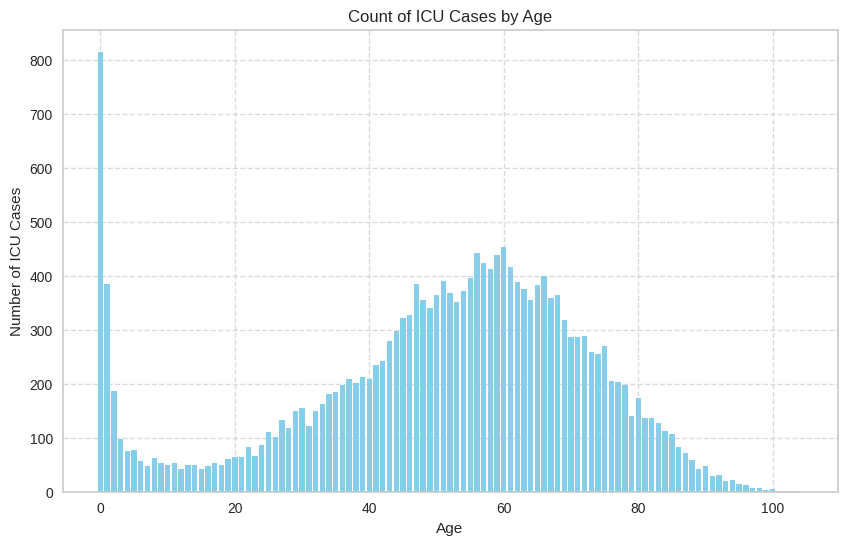

In [54]:
analytics_df = md.cleanDataForModeling(analytics_df)

icu_by_age = analytics_df_main[analytics_df_main['ICU'] == 1.0].groupby('AGE').size().reset_index(name='ICU_Count')

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(icu_by_age['AGE'], icu_by_age['ICU_Count'], color='skyblue')
plt.xlabel('Age')
plt.ylabel('Number of ICU Cases')
plt.title('Count of ICU Cases by Age')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [55]:
from collections import Counter

analytics_df = md.cleanDataForModeling(analytics_df)
occurence = []
count = 0
occurence = occurence + md.feature_selection_coefficient(df=analytics_df, target_column='ICU', select_k_best=6)
count = count + 1
print('-' * 100)
occurence = occurence + md.feature_selection_mutual_info(df=analytics_df, target_column='ICU', select_k_best=6)
count = count + 1
print('-' * 100)
occurence = occurence + md.feature_selection_anova(df=analytics_df, target_column='ICU', select_k_best=6)
count = count + 1
print('-' * 100)
occurence = occurence + md.feature_selection_chi2(df=analytics_df, target_column='ICU', continuous_columns=[], select_k_best=6)
count = count + 1
print('-' * 100)
occurence = occurence + md.feature_selection_rfe(df=analytics_df, target_column='ICU', select_k_best=6)
count = count + 1
print('-' * 100)
select_feature_probability = dict(Counter(occurence))
select_feature_probability = {k:float(v/count) for k, v in select_feature_probability.items()}
print(select_feature_probability)

Correlations with target:
INTUBED           0.326269
PNEUMONIA         0.155660
OBESITY           0.035380
SEX               0.032110
CARDIOVASCULAR    0.017832
PREGNANT          0.015103
INMSUPR           0.010256
ASTHMA            0.010072
OTHER_DISEASE     0.004523
COPD              0.001298
DIABETES          0.000168
TOBACCO          -0.000426
HIPERTENSION     -0.003412
RENAL_CHRONIC    -0.009862
AGE              -0.044928
dtype: float64
Top 6 features: ['INTUBED', 'PNEUMONIA', 'AGE', 'OBESITY', 'SEX', 'CARDIOVASCULAR']
----------------------------------------------------------------------------------------------------
Mutual Information Scores:
INTUBED           0.044357
PNEUMONIA         0.043678
SEX               0.031813
HIPERTENSION      0.011957
DIABETES          0.009400
OBESITY           0.005065
AGE               0.003828
RENAL_CHRONIC     0.000822
CARDIOVASCULAR    0.000663
OTHER_DISEASE     0.000363
INMSUPR           0.000357
TOBACCO           0.000227
PREGNANT          

### Logistic Regression Model with PySpark

#### 1. 5 chosen features: 'SEX', 'INTUBED', 'PNEUMONIA', 'AGE', 'OBESITY'

In [56]:
# 5 chosen features: 'INTUBED', 'PNEUMONIA', 'AGE', 'OBESITY', 'SEX'
# ['INTUBED', 'PNEUMONIA', 'AGE', 'PREGNANT', 'ASTHMA', 'OTHER_DISEASE']
analytics_df = analytics_df_main[['SEX', 'INTUBED', 'PNEUMONIA', 'AGE', 'OBESITY','ICU']]
analytics_df.to_csv('data/Dataset_revised_pyspark.csv', index=False)

#Apply MinMax Scaler
analytics_df = md.cleanDataForModeling(analytics_df)

##### Apply Logistic Regression model with PySpark to dataset

root
 |-- SEX: double (nullable = true)
 |-- INTUBED: double (nullable = true)
 |-- PNEUMONIA: double (nullable = true)
 |-- AGE: integer (nullable = true)
 |-- OBESITY: double (nullable = true)
 |-- ICU: double (nullable = true)



+-------+------------------+-------------------+-------------------+-----------------+-------------------+-------------------+
|summary|               SEX|            INTUBED|          PNEUMONIA|              AGE|            OBESITY|                ICU|
+-------+------------------+-------------------+-------------------+-----------------+-------------------+-------------------+
|  count|            200031|             200031|             200031|           200031|             200031|             200031|
|   mean|1.5914333278341857|0.18820582809664502| 0.6089606111052787|52.77003064524999|0.20333848253520703|0.09752988286815543|
| stddev|0.4915700912176145|0.39087742090648214|0.48798440106925334|19.82984587636618|  0.402483234301421|0.29667868955976645|
|    min|               1.0|                0.0|                0.0|                0|                0.0|                0.0|
|    25%|               1.0|                0.0|                0.0|               41|                0.0|     

Training Accuracy: 0.9047910703348624
Test Accuracy: 0.9046096189881324
ROC AUC Score: 0.7683682748550856


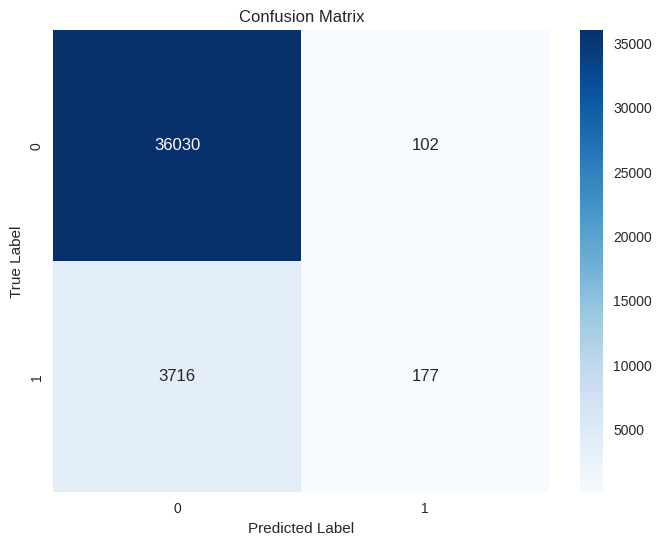


Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     36132
           1       0.63      0.05      0.08      3893

    accuracy                           0.90     40025
   macro avg       0.77      0.52      0.52     40025
weighted avg       0.88      0.90      0.87     40025



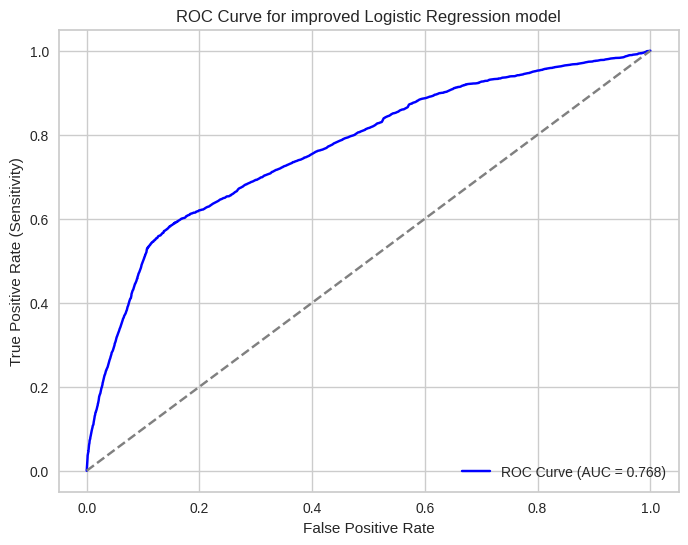

In [57]:
mdp.trainAndTestImprovedModel(DATA_PATH='data/Dataset_revised_pyspark.csv', sampling=None)

##### Apply Logistic Regression model to oversampling dataset

root
 |-- SEX: double (nullable = true)
 |-- INTUBED: double (nullable = true)
 |-- PNEUMONIA: double (nullable = true)
 |-- AGE: integer (nullable = true)
 |-- OBESITY: double (nullable = true)
 |-- ICU: double (nullable = true)



+-------+------------------+-------------------+-------------------+-----------------+-------------------+-------------------+
|summary|               SEX|            INTUBED|          PNEUMONIA|              AGE|            OBESITY|                ICU|
+-------+------------------+-------------------+-------------------+-----------------+-------------------+-------------------+
|  count|            200031|             200031|             200031|           200031|             200031|             200031|
|   mean|1.5914333278341857|0.18820582809664502| 0.6089606111052787|52.77003064524999|0.20333848253520703|0.09752988286815543|
| stddev|0.4915700912176145|0.39087742090648214|0.48798440106925334|19.82984587636618|  0.402483234301421|0.29667868955976645|
|    min|               1.0|                0.0|                0.0|                0|                0.0|                0.0|
|    25%|               1.0|                0.0|                0.0|               41|                0.0|     

+---+------+
|ICU| count|
+---+------+
|0.0|144390|
|1.0| 15616|
+---+------+



+---+------+
|ICU| count|
+---+------+
|0.0|144390|
|1.0|144481|
+---+------+



Training Accuracy: 0.7160497246175629
Test Accuracy: 0.8000499687695191
ROC AUC Score: 0.7686810319521112


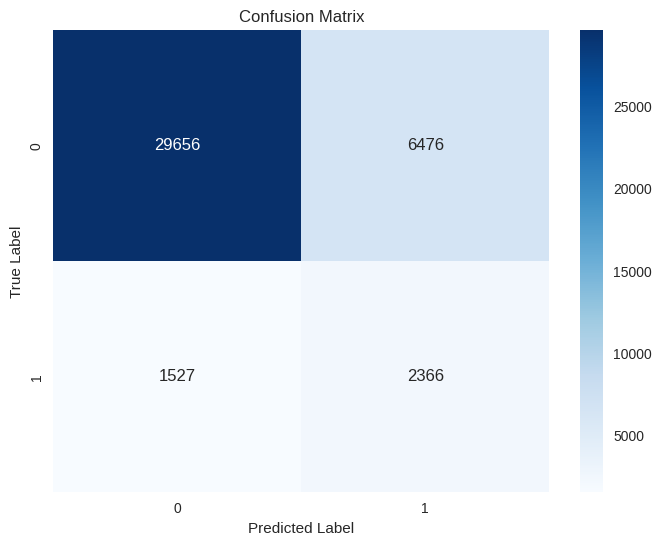


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.82      0.88     36132
           1       0.27      0.61      0.37      3893

    accuracy                           0.80     40025
   macro avg       0.61      0.71      0.63     40025
weighted avg       0.88      0.80      0.83     40025



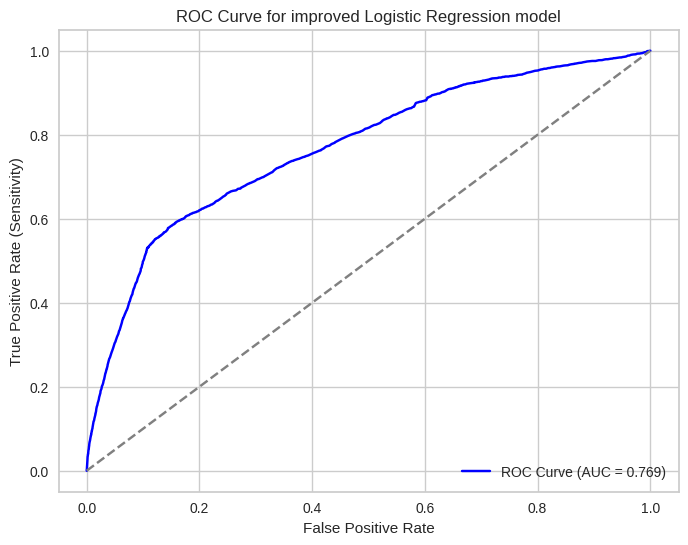

In [58]:
mdp.trainAndTestImprovedModel(DATA_PATH='data/Dataset_revised_pyspark.csv', sampling='oversampling')

root
 |-- SEX: double (nullable = true)
 |-- INTUBED: double (nullable = true)
 |-- PNEUMONIA: double (nullable = true)
 |-- AGE: integer (nullable = true)
 |-- OBESITY: double (nullable = true)
 |-- ICU: double (nullable = true)



+-------+------------------+-------------------+-------------------+-----------------+-------------------+-------------------+
|summary|               SEX|            INTUBED|          PNEUMONIA|              AGE|            OBESITY|                ICU|
+-------+------------------+-------------------+-------------------+-----------------+-------------------+-------------------+
|  count|            200031|             200031|             200031|           200031|             200031|             200031|
|   mean|1.5914333278341857|0.18820582809664502| 0.6089606111052787|52.77003064524999|0.20333848253520703|0.09752988286815543|
| stddev|0.4915700912176145|0.39087742090648214|0.48798440106925334|19.82984587636618|  0.402483234301421|0.29667868955976645|
|    min|               1.0|                0.0|                0.0|                0|                0.0|                0.0|
|    25%|               1.0|                0.0|                0.0|               41|                0.0|     

+---+------+
|ICU| count|
+---+------+
|0.0|144390|
|1.0| 15616|
+---+------+



+---+-----+
|ICU|count|
+---+-----+
|0.0|15550|
|1.0|15616|
+---+-----+



Training Accuracy: 0.7170955528460502
Test Accuracy: 0.8041224234853217
ROC AUC Score: 0.7681081972772777


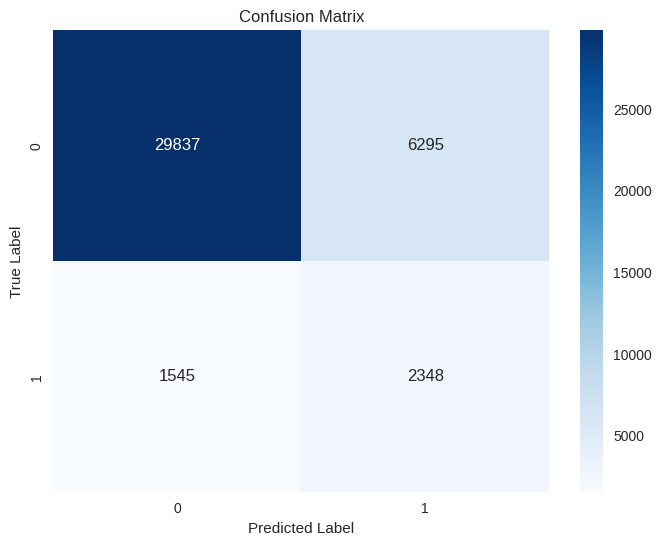


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.83      0.88     36132
           1       0.27      0.60      0.37      3893

    accuracy                           0.80     40025
   macro avg       0.61      0.71      0.63     40025
weighted avg       0.88      0.80      0.83     40025



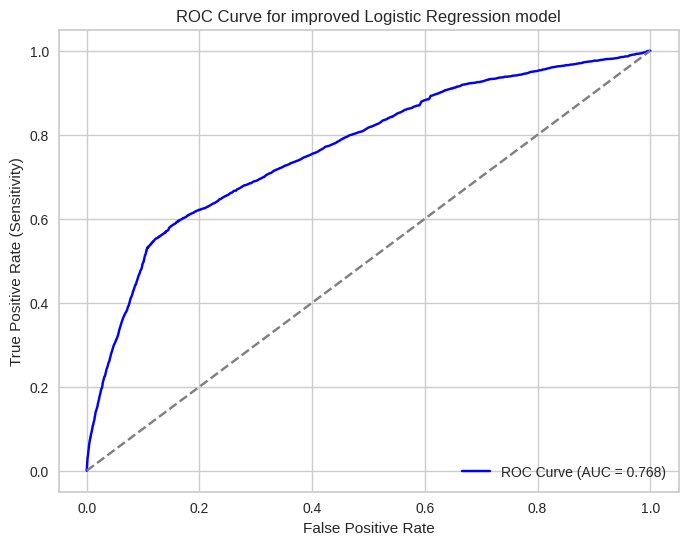

In [59]:
mdp.trainAndTestImprovedModel(DATA_PATH='data/Dataset_revised_pyspark.csv', sampling='undersampling')

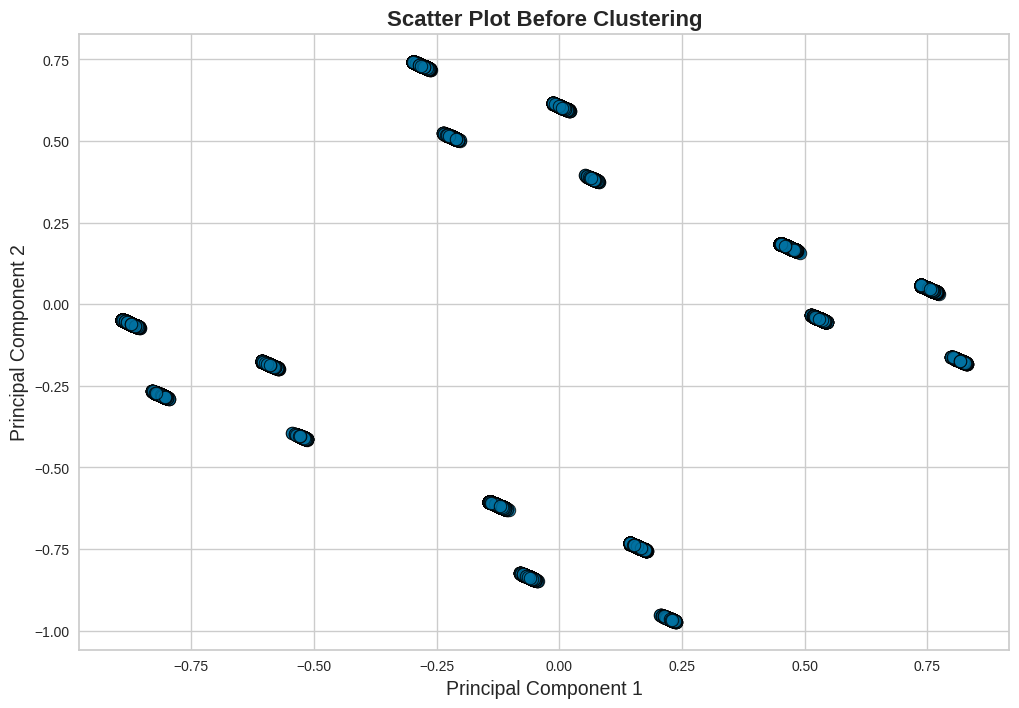

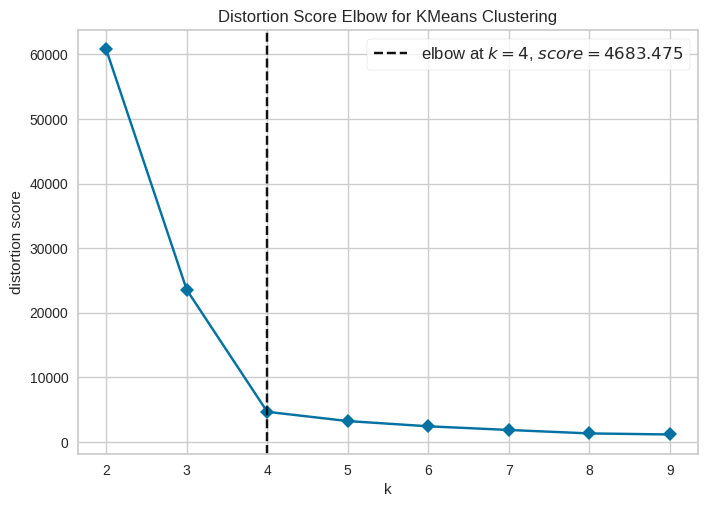

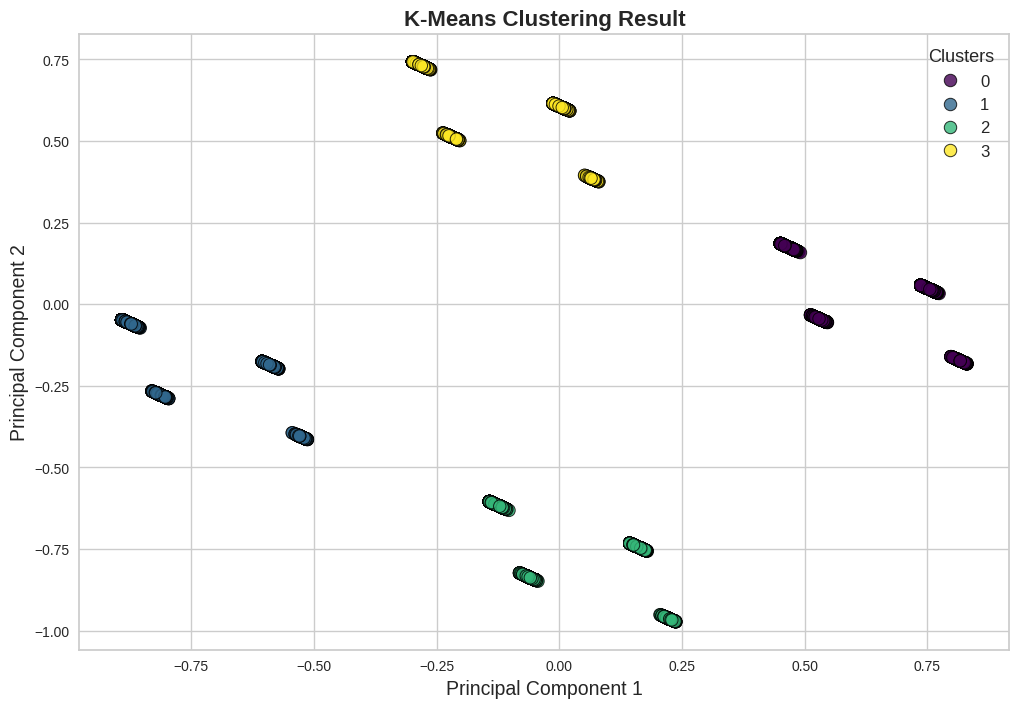

Training and evaluating model for Cluster 0...

Cluster 0 - Accuracy: 0.8660582472151389
Cluster 0 - AUC: 0.7432169221762911
Cluster 0 - Confusion Matrix:
[[12750    88]
 [ 1908   156]]
Cluster 0 - Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93     12838
         1.0       0.64      0.08      0.14      2064

    accuracy                           0.87     14902
   macro avg       0.75      0.53      0.53     14902
weighted avg       0.84      0.87      0.82     14902

Training and evaluating model for Cluster 1...

Cluster 1 - Accuracy: 0.9600580973129993
Cluster 1 - AUC: 0.6739169302709394
Cluster 1 - Confusion Matrix:
[[6610    0]
 [ 275    0]]
Cluster 1 - Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      6610
         1.0       0.00      0.00      0.00       275

    accuracy                           0.96      6885
   macro avg     

/opt/miniconda3/envs/conda-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/conda-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/conda-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

{0: {'Accuracy': 0.8660582472151389,
  'AUC': 0.7432169221762911,
  'Confusion Matrix': array([[12750,    88],
         [ 1908,   156]]),
  'Classification Report': '              precision    recall  f1-score   support\n\n         0.0       0.87      0.99      0.93     12838\n         1.0       0.64      0.08      0.14      2064\n\n    accuracy                           0.87     14902\n   macro avg       0.75      0.53      0.53     14902\nweighted avg       0.84      0.87      0.82     14902\n'},
 1: {'Accuracy': 0.9600580973129993,
  'AUC': 0.6739169302709394,
  'Confusion Matrix': array([[6610,    0],
         [ 275,    0]]),
  'Classification Report': '              precision    recall  f1-score   support\n\n         0.0       0.96      1.00      0.98      6610\n         1.0       0.00      0.00      0.00       275\n\n    accuracy                           0.96      6885\n   macro avg       0.48      0.50      0.49      6885\nweighted avg       0.92      0.96      0.94      6885\n

In [60]:
mdp.trainAndTestKmeansClassifiers(DATA_PATH='data/Dataset_revised_pyspark.csv', sampling=None)

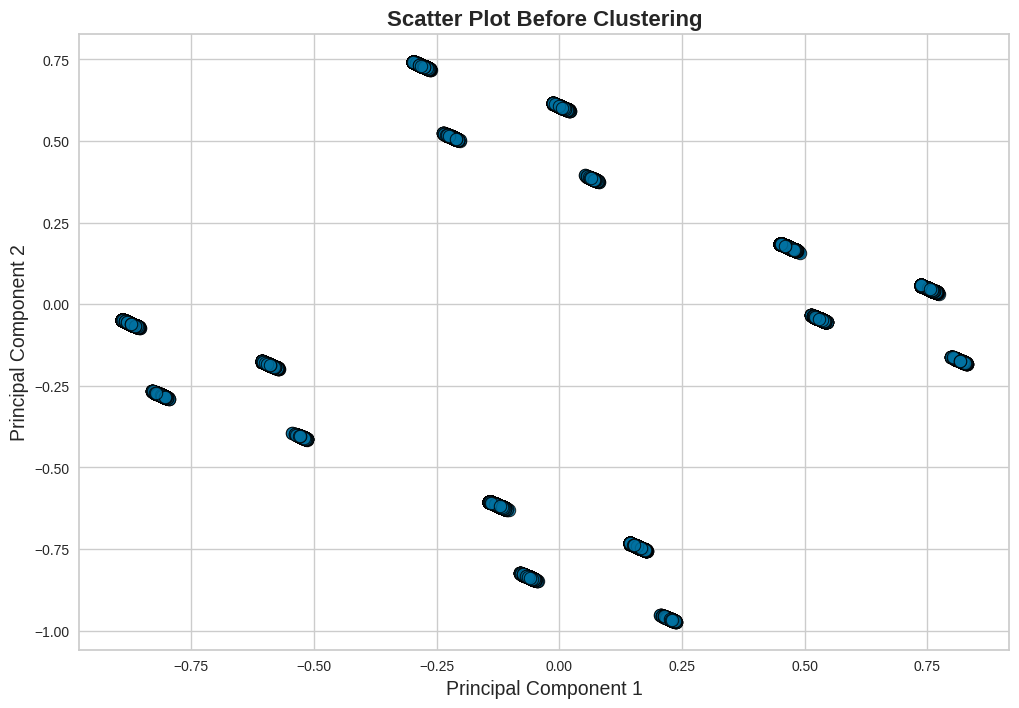

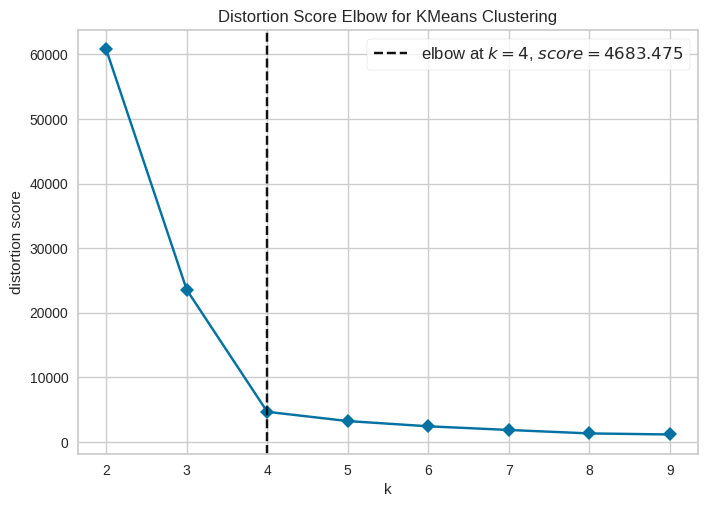

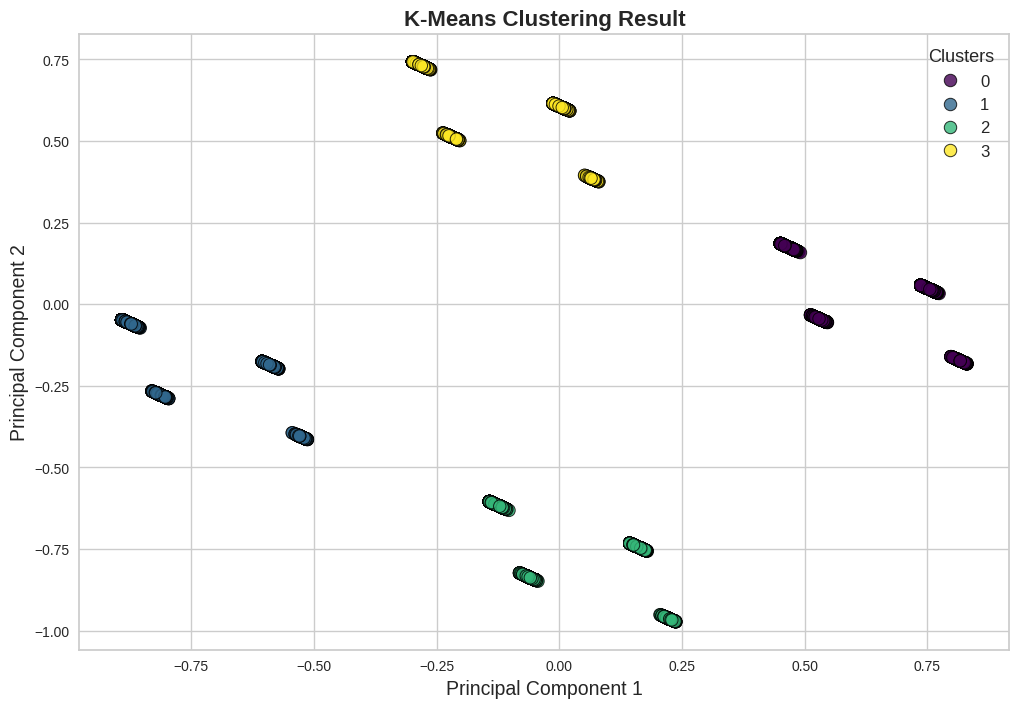

Training and evaluating model for Cluster 0...

Cluster 0 - Accuracy: 0.8660582472151389
Cluster 0 - AUC: 0.7432169221762911
Cluster 0 - Confusion Matrix:
[[12750    88]
 [ 1908   156]]
Cluster 0 - Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93     12838
         1.0       0.64      0.08      0.14      2064

    accuracy                           0.87     14902
   macro avg       0.75      0.53      0.53     14902
weighted avg       0.84      0.87      0.82     14902

Training and evaluating model for Cluster 1...

Cluster 1 - Accuracy: 0.9600580973129993
Cluster 1 - AUC: 0.6739169302709394
Cluster 1 - Confusion Matrix:
[[6610    0]
 [ 275    0]]
Cluster 1 - Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      6610
         1.0       0.00      0.00      0.00       275

    accuracy                           0.96      6885
   macro avg     

/opt/miniconda3/envs/conda-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/conda-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/conda-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

{0: {'Accuracy': 0.8660582472151389,
  'AUC': 0.7432169221762911,
  'Confusion Matrix': array([[12750,    88],
         [ 1908,   156]]),
  'Classification Report': '              precision    recall  f1-score   support\n\n         0.0       0.87      0.99      0.93     12838\n         1.0       0.64      0.08      0.14      2064\n\n    accuracy                           0.87     14902\n   macro avg       0.75      0.53      0.53     14902\nweighted avg       0.84      0.87      0.82     14902\n'},
 1: {'Accuracy': 0.9600580973129993,
  'AUC': 0.6739169302709394,
  'Confusion Matrix': array([[6610,    0],
         [ 275,    0]]),
  'Classification Report': '              precision    recall  f1-score   support\n\n         0.0       0.96      1.00      0.98      6610\n         1.0       0.00      0.00      0.00       275\n\n    accuracy                           0.96      6885\n   macro avg       0.48      0.50      0.49      6885\nweighted avg       0.92      0.96      0.94      6885\n

In [61]:
mdp.trainAndTestKmeansClassifiers(DATA_PATH='data/Dataset_revised_pyspark.csv', sampling=None)

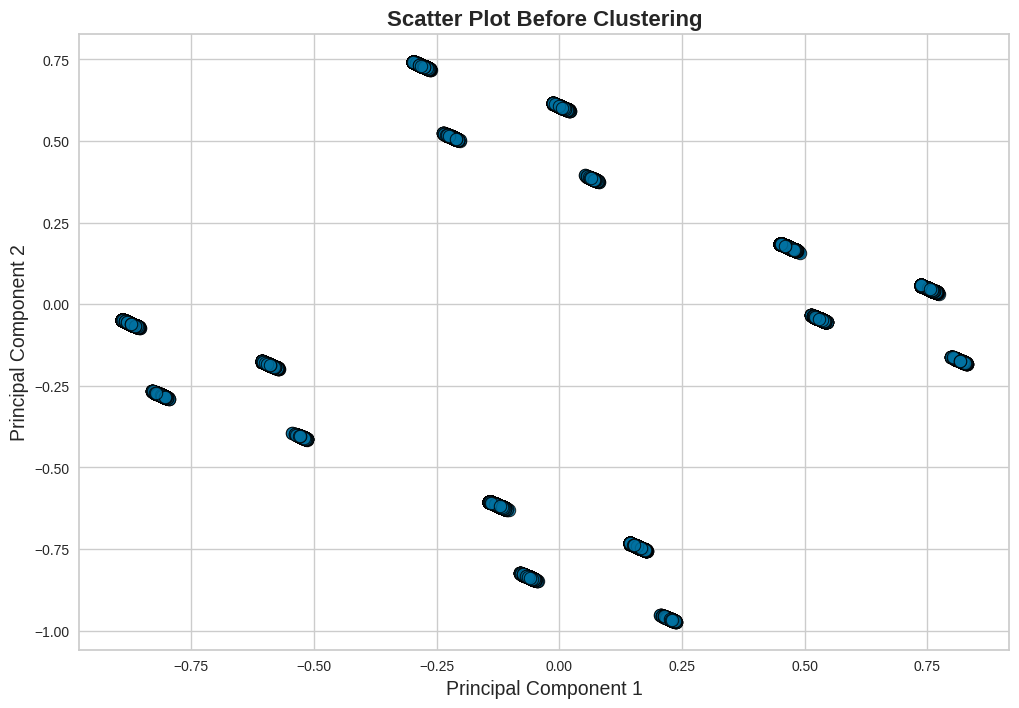

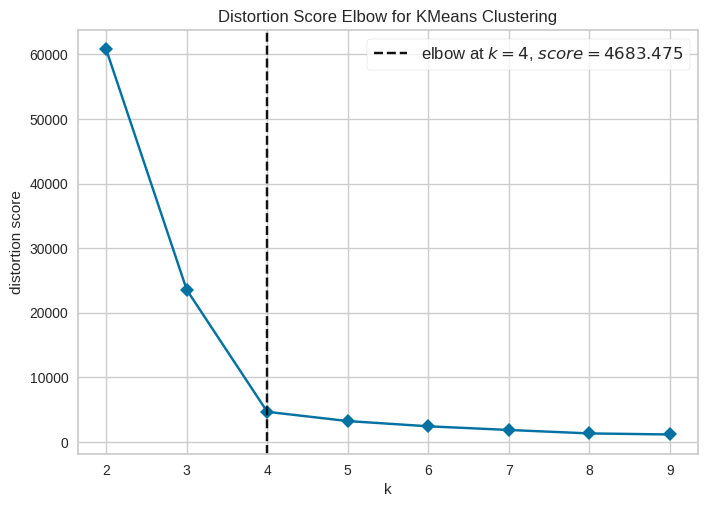

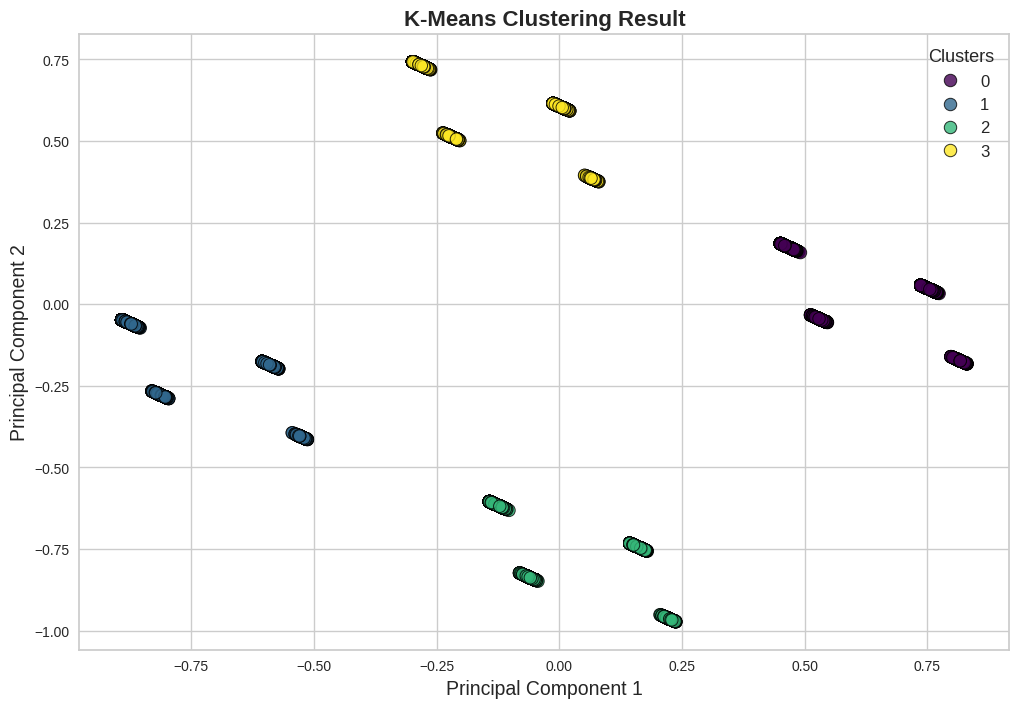

Training and evaluating model for Cluster 0...

Cluster 0 - Accuracy: 0.8660582472151389
Cluster 0 - AUC: 0.7432169221762911
Cluster 0 - Confusion Matrix:
[[12750    88]
 [ 1908   156]]
Cluster 0 - Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93     12838
         1.0       0.64      0.08      0.14      2064

    accuracy                           0.87     14902
   macro avg       0.75      0.53      0.53     14902
weighted avg       0.84      0.87      0.82     14902

Training and evaluating model for Cluster 1...

Cluster 1 - Accuracy: 0.9600580973129993
Cluster 1 - AUC: 0.6739169302709394
Cluster 1 - Confusion Matrix:
[[6610    0]
 [ 275    0]]
Cluster 1 - Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      6610
         1.0       0.00      0.00      0.00       275

    accuracy                           0.96      6885
   macro avg     

/opt/miniconda3/envs/conda-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/conda-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/conda-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

{0: {'Accuracy': 0.8660582472151389,
  'AUC': 0.7432169221762911,
  'Confusion Matrix': array([[12750,    88],
         [ 1908,   156]]),
  'Classification Report': '              precision    recall  f1-score   support\n\n         0.0       0.87      0.99      0.93     12838\n         1.0       0.64      0.08      0.14      2064\n\n    accuracy                           0.87     14902\n   macro avg       0.75      0.53      0.53     14902\nweighted avg       0.84      0.87      0.82     14902\n'},
 1: {'Accuracy': 0.9600580973129993,
  'AUC': 0.6739169302709394,
  'Confusion Matrix': array([[6610,    0],
         [ 275,    0]]),
  'Classification Report': '              precision    recall  f1-score   support\n\n         0.0       0.96      1.00      0.98      6610\n         1.0       0.00      0.00      0.00       275\n\n    accuracy                           0.96      6885\n   macro avg       0.48      0.50      0.49      6885\nweighted avg       0.92      0.96      0.94      6885\n

In [62]:
mdp.trainAndTestKmeansClassifiers(DATA_PATH='data/Dataset_revised_pyspark.csv', sampling=None)

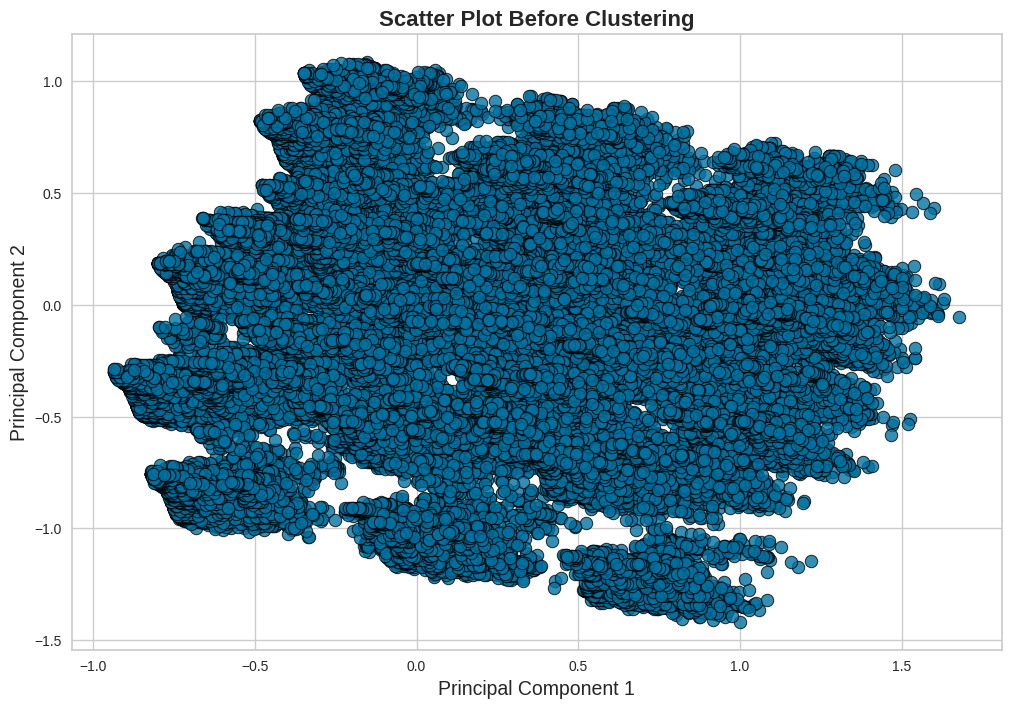

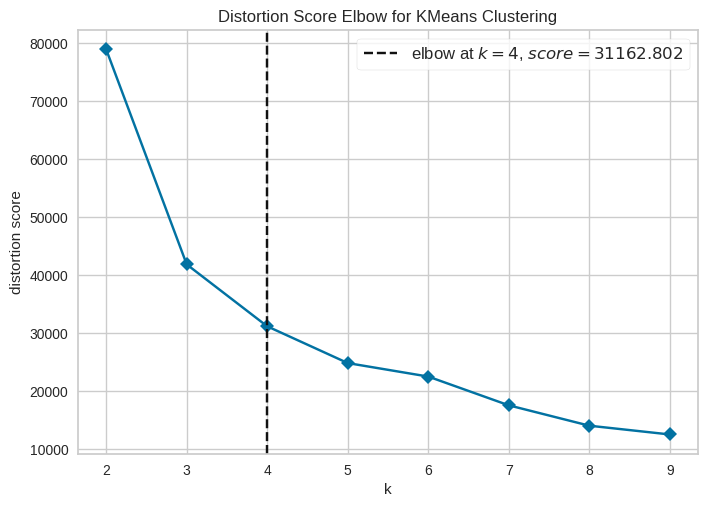

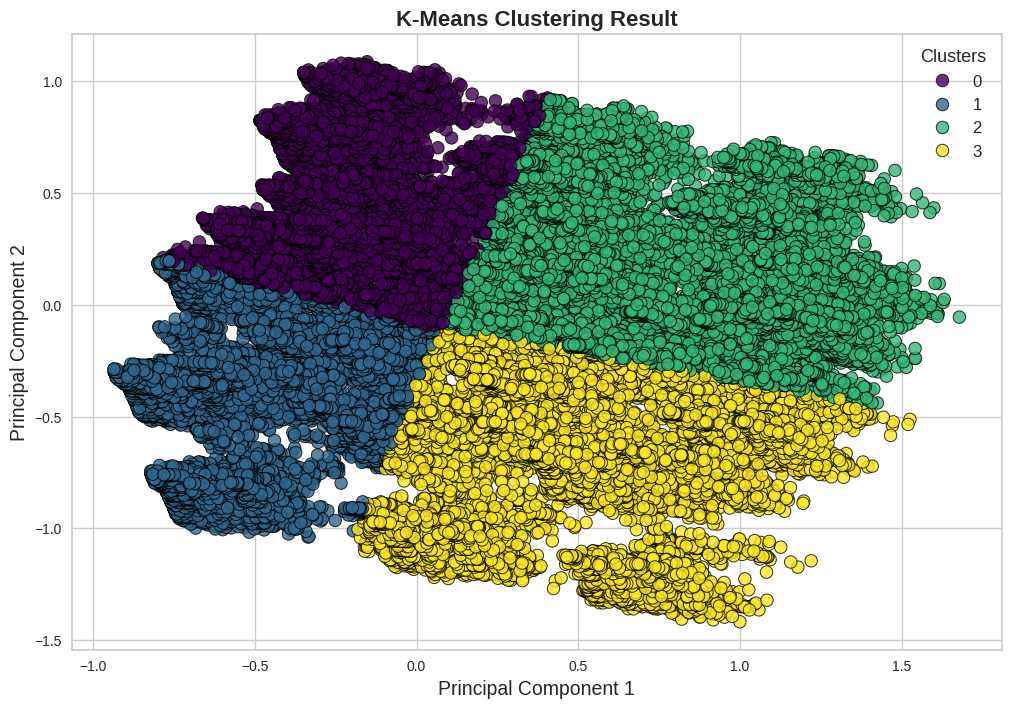

Training and evaluating model for Cluster 0...

Cluster 0 - Accuracy: 0.8705278480042902
Cluster 0 - AUC: 0.812416721930688
Cluster 0 - Confusion Matrix:
[[10853   362]
 [ 1328   510]]
Cluster 0 - Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93     11215
         1.0       0.58      0.28      0.38      1838

    accuracy                           0.87     13053
   macro avg       0.74      0.62      0.65     13053
weighted avg       0.85      0.87      0.85     13053

Training and evaluating model for Cluster 1...

Cluster 1 - Accuracy: 0.9581548893647395
Cluster 1 - AUC: 0.7568249719653076
Cluster 1 - Confusion Matrix:
[[10733     4]
 [  465     6]]
Cluster 1 - Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     10737
         1.0       0.60      0.01      0.02       471

    accuracy                           0.96     11208
   macro avg  

{0: {'Accuracy': 0.8705278480042902,
  'AUC': 0.812416721930688,
  'Confusion Matrix': array([[10853,   362],
         [ 1328,   510]]),
  'Classification Report': '              precision    recall  f1-score   support\n\n         0.0       0.89      0.97      0.93     11215\n         1.0       0.58      0.28      0.38      1838\n\n    accuracy                           0.87     13053\n   macro avg       0.74      0.62      0.65     13053\nweighted avg       0.85      0.87      0.85     13053\n'},
 1: {'Accuracy': 0.9581548893647395,
  'AUC': 0.7568249719653076,
  'Confusion Matrix': array([[10733,     4],
         [  465,     6]]),
  'Classification Report': '              precision    recall  f1-score   support\n\n         0.0       0.96      1.00      0.98     10737\n         1.0       0.60      0.01      0.02       471\n\n    accuracy                           0.96     11208\n   macro avg       0.78      0.51      0.50     11208\nweighted avg       0.94      0.96      0.94     1120

In [63]:
mdp.trainAndTestKmeansClassifiers(DATA_PATH='data/Dataset_revised_new.csv', sampling=None)